# Chapitre 6
##### 6.1 Intuition

In [50]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

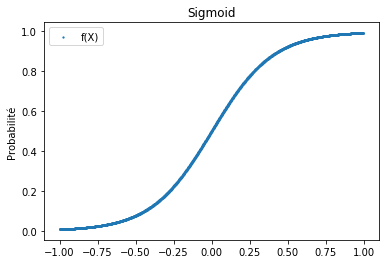

In [51]:
##### Création de la fonction sigmoïde
def f(x):
    s = 1/(1+np.exp(-5*x))
    return s

##### Affichage de la fonction sigmoïde
sigmoid = [f(x) for x in np.arange(-1,1,0.001)]
k = [k for k in np.arange(-1,1,0.001)]

plt.scatter(k,sigmoid,s=1.5, label = "f(X)")
plt.title("Sigmoid")
plt.legend()
plt.ylabel("Probabilité")
plt.show()

##### 6.2 Comment implémenter une régression logistique avec sklearn

In [63]:
from sklearn import datasets

iris = datasets.load_iris()
data_iris = pds.DataFrame(iris.data)
target = pds.DataFrame(iris.target)

bd = pds.concat((data_iris,target), axis = 1).values

X_train = bd[0:100,0:4]
X_visu = bd[100:150,0:4]
y_train = bd[0:100,4:5]
y_visu = bd[100:150,4:5]

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_visu)

from sklearn.metrics import accuracy_score
accuracy_score(y_visu, y_pred)

0.0

In [65]:
from sklearn.model_selection import train_test_split

X = bd[:,0:4]
y = bd[:,4:5]

X_train, X_visu, y_train, yvisu = train_test_split(X,y)

Accuracy: 0.8157894736842105


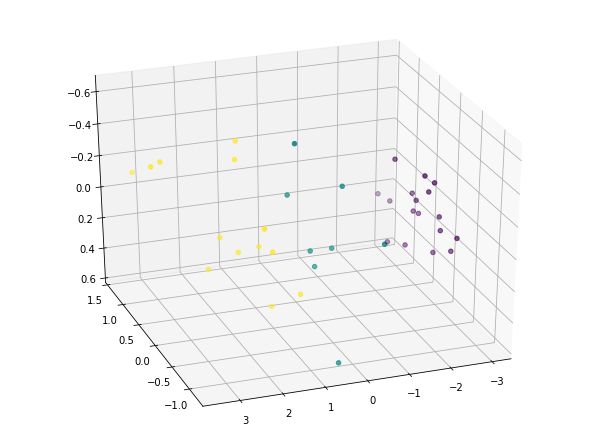

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X = bd[:,0:4]
y = bd[:,4:5]

acp = PCA(n_components = 3)
X_pca = acp.fit_transform(X)

X_train, X_visu, y_train, y_visu = train_test_split(X_pca,y)


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_visu)


##### Affichage 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_visu[:,0], X_visu[:,1], X_visu[:,2], c=y_pred)

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_visu, y_pred))

##### 6.3 Régression logistique en finance

In [56]:
datasets = pds.read_excel("dataset.xlsx", index_col="Date", parse_dates=True)
datasets_pct = datasets.pct_change(1).dropna().reset_index(drop=True)
datasets_pct["Étiquetage"] = round(datasets_pct["NQ100"]+0.5)
datasets_pct


,AMZN,BRENT,CAC40,NQ100,DJI30,DAX30,GOLD,EURUSD,Étiquetage
0,0.000491,0.026939,0.004642,0.001401,0.000453,0.000937,0.001387,0.007801,1.0
1,0.001419,-0.003259,-0.005957,0.005264,-0.000680,-0.001649,0.001807,0.003870,1.0
2,0.046591,-0.009570,-0.008233,0.001904,-0.004007,-0.011532,-0.008057,0.000832,1.0
3,-0.009008,-0.001771,-0.004885,0.001133,-0.002657,0.000396,0.001091,-0.001586,1.0
4,0.006883,-0.007098,-0.014499,-0.001095,-0.005175,-0.011860,-0.003028,-0.000984,0.0
...,...,...,...,...,...,...,...,...,...
1794,0.010850,-0.040024,0.001473,0.005965,0.003571,0.001411,0.024934,0.000000,1.0
1795,-0.003511,0.009792,0.005935,0.007436,0.007054,0.005970,-0.001636,-0.000230,1.0
1796,0.001098,0.016109,-0.007790,-0.004969,-0.002918,-0.004866,-0.012290,-0.005247,0.0
1797,0.009279,-0.007388,0.000804,-0.006924,-0.004178,-0.005599,-0.002517,-0.000846,0.0


In [57]:
##### Scindage de la base de données en X et y
X = datasets_pct[["AMZN", "BRENT", "CAC40","NQ100",
              "DJI30", "DAX30", "GOLD", "EURUSD"]]
y = datasets_pct[["Étiquetage"]]

##### Scindage en en jeu de train et jeu de visualisation
##### On met un intervalle d'écart de une période
X_train = X.iloc[0:1400-1,:].values
X_visu = X.iloc[1400:1700-1,:].values

y_train = y.iloc[1:1400,:].values
y_visu = y.iloc[1400+1:1700,:].values

In [58]:
##### Importation de la fonction de standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

##### Entrainement de la standardisation et application
Xtrain_sc = sc.fit_transform(X_train)

##### Application de la standardisation
Xvisu_sc = sc.transform(X_visu)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

lr.fit(Xtrain_sc, y_train)
y_pred = lr.predict(Xvisu_sc)
accuracy_score(y_visu, y_pred)

In [60]:
from sklearn.metrics import confusion_matrix
pds.DataFrame(confusion_matrix(y_visu,y_pred), columns=["Vrai", "Faux"], index=["Vrai", "Faux"])

,Vrai,Faux
Vrai,31,103
Faux,18,147
